<a href="https://colab.research.google.com/github/manishramamoorthy/Guvi-Task/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
data = pd.read_csv("/content/Social_Network_Ads.csv")

**Splitting the dataset into the Training set and Test set**

In [3]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [5]:
X=data.drop(columns=['Purchased','Gender','User ID'])
Y=data['Purchased']

In [6]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=7)

**Feature Scaling**

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [9]:
randomforest=RandomForestClassifier(max_depth=99,n_estimators=5,random_state=7)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=99, n_estimators=5, random_state=7)

**Predicting the Test set results**

In [10]:
y_pred=randomforest.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

**Making the Confusion Matrix**

In [11]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,61,7,68
1,7,25,32
All,68,32,100


**Visualising the Training set results**

In [12]:
training_score = randomforest.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 97.66666666666667


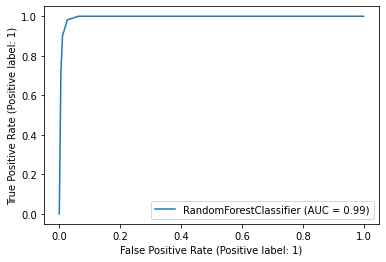

In [13]:
RocCurveDisplay.from_estimator(randomforest,x_train,y_train)

**Visualising the Test set results**

In [14]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 86.0


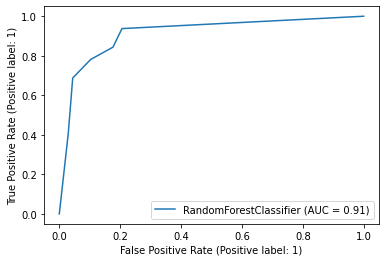

In [15]:
RocCurveDisplay.from_estimator(randomforest,x_test,y_test)